In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [23]:
df = pd.read_csv("./breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Drop the id column as it does not tell us anything

In [24]:
df = df.drop(columns="id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Check normality of variables

Use the shapiro-wilk test to check normality statistically. Can also create histograms and Q-Q plots if important (such as for non-normally distributed variables)

Plot the QQ-plots for each variable as a visual test prior to conducting statistical tests.

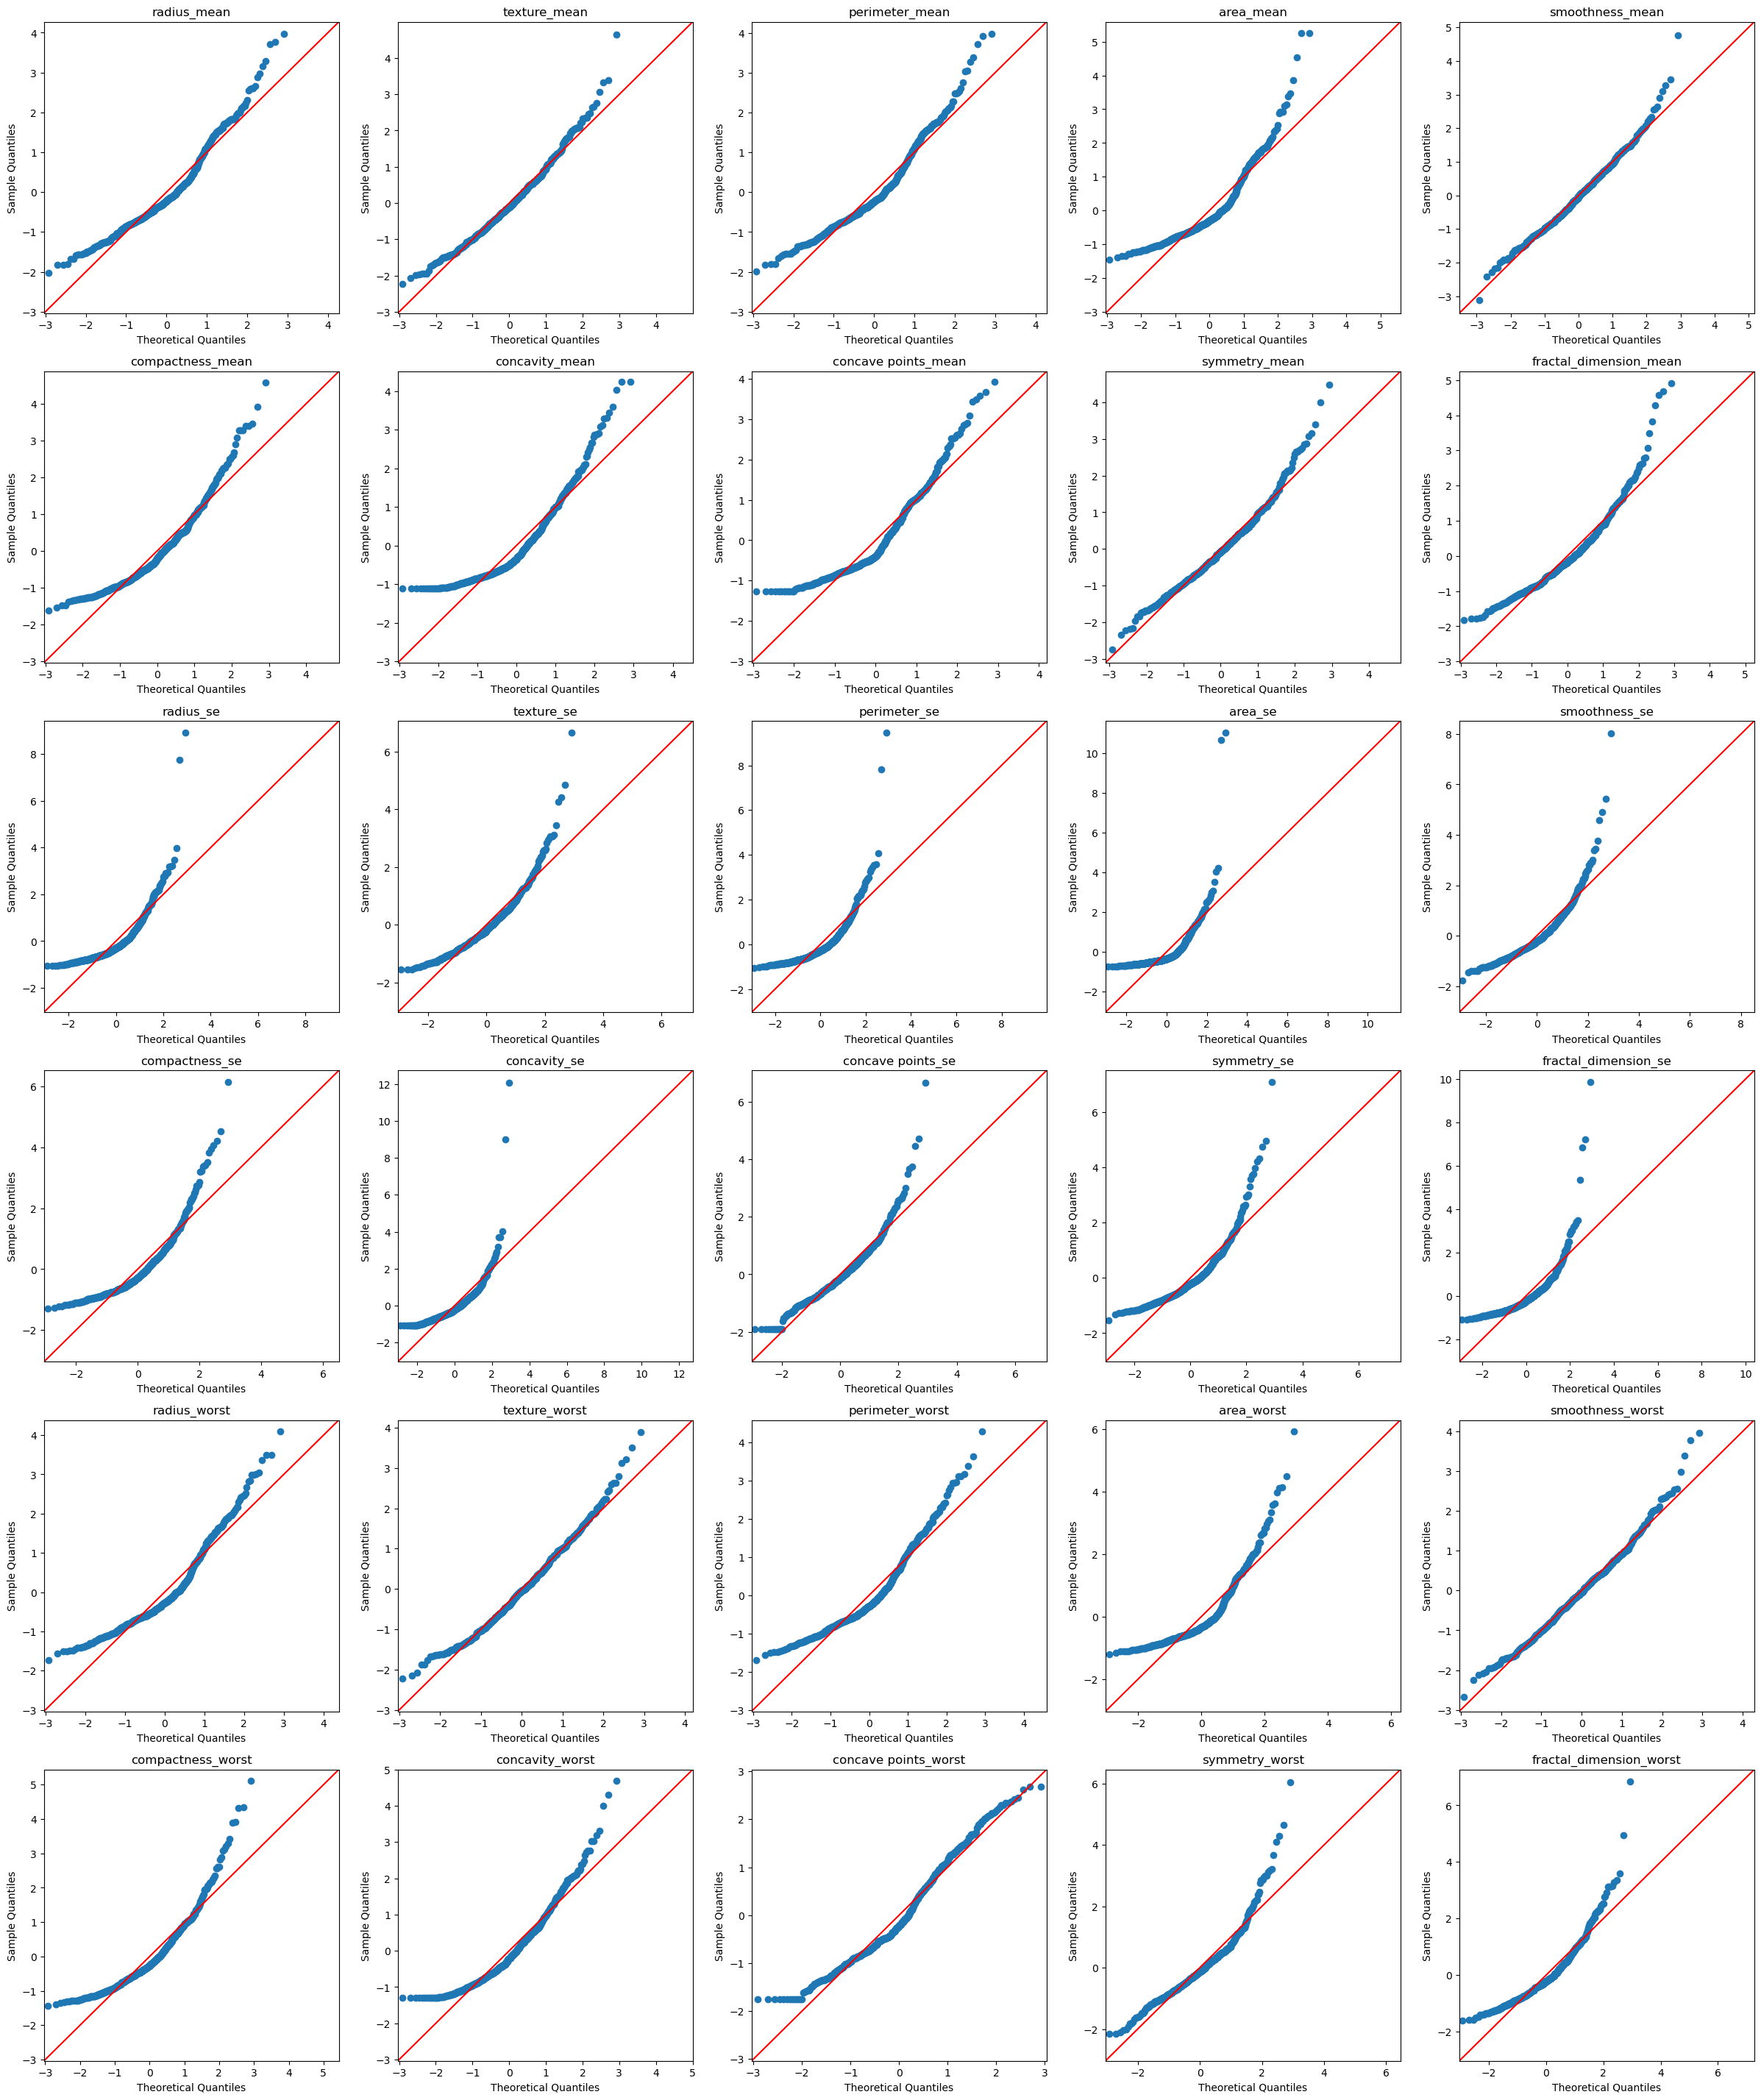

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

qqDf = df.iloc[:, 1:]
cols = qqDf.columns.to_list()

fig, ax = plt.subplots(6, 5, figsize = (30, 36))
ax = ax.ravel()
for i in range(0, 30):
    sm.qqplot(data=qqDf.iloc[:, i], line='45', fit=True, dist=stats.norm, ax=ax[i])
    ax[i].set_title(f'{cols[i]}')

plt.show()

In [26]:
from scipy.stats import shapiro

sw_res = df.loc[:, 'radius_mean':].apply(shapiro, axis = 0)
sw_res = sw_res.rename(index={0: "Shapiro-Wilk statistic", 1: "P-value"})
sw_res

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Shapiro-Wilk statistic,9.410696e-01,9.767201e-01,9.361826e-01,8.584018e-01,0.987487,9.169785e-01,8.668309e-01,8.916499e-01,9.725881e-01,9.232837e-01,...,9.134926e-01,0.982562,9.125851e-01,8.160705e-01,0.98862,8.910646e-01,9.175271e-01,9.648364e-01,9.161444e-01,8.895459e-01
P-value,3.106155e-14,7.281474e-08,7.011630e-15,3.196511e-22,0.000086,3.967941e-17,1.338583e-21,1.404436e-19,7.881996e-09,1.956494e-16,...,1.704317e-17,0.000003,1.373282e-17,5.595767e-25,0.00021,1.247598e-19,4.542876e-17,1.985903e-10,3.234118e-17,9.195530e-20


If the Shapiro-Wilk test p-value is less than 0.05 the data is not normally distributed. Therefore, we need to use Spearman Rank Correlation Coefficient instead of Pearson correlation coefficient

In [27]:
df[sw_res.columns[sw_res.iloc[1,:] < 0.05]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


All columns are not normally distributed.

# Test heteroscedasticity using White test

In [28]:
import scipy.stats as stats

m_df = df.loc[df['diagnosis'] == 'M', :]
b_df = df.loc[df['diagnosis'] == 'B', :]

stat, p = stats.levene(m_df.loc[:, 'radius_mean'], b_df.loc[:, 'radius_mean'], center='median')
p

5.279775501703329e-20

# Test correlation with diagnosis using Kruskal-Wallis Test

Observations are not paired (ie,, there is only one observation per patient), therefore we use Kurskal-Wallis over Mann-Whitney U test.

In [29]:
import scipy.stats as stats

m_df = df.loc[df['diagnosis'] == 'M', :]
b_df = df.loc[df['diagnosis'] == 'B', :]

cols = df.loc[:, 'radius_mean':].columns.to_list()

res = pd.DataFrame(0, index=['Statistic', 'p-value'], columns=cols)

for c in cols:
    stat, pvalue = stats.kruskal(m_df.loc[:, c], b_df.loc[:, c])
    res.loc['Statistic', c] = stat
    res.loc['p-value', c] = pvalue
    
res.loc['p-value', :] < 0.05

radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean               True
fractal_dimension_mean     False
radius_se                   True
texture_se                 False
perimeter_se                True
area_se                     True
smoothness_se              False
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst              True
fractal_dimension_worst     True
Name: p-va

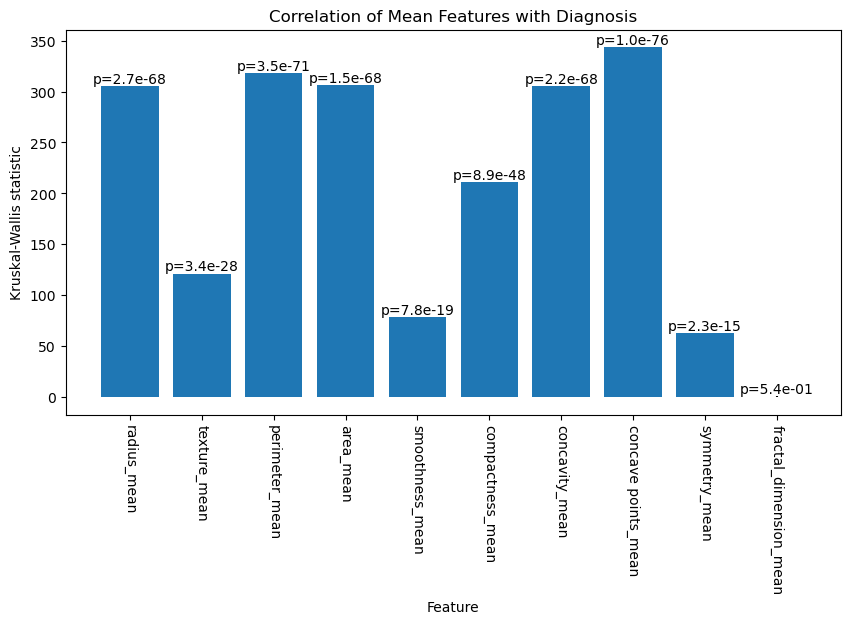

In [30]:
mean_cols = df.loc[:, 'radius_mean':'fractal_dimension_mean'].columns.to_list()
se_cols = df.loc[:, 'radius_se':'fractal_dimension_se'].columns.to_list()
worst_cols = df.loc[:, 'radius_worst':].columns.to_list()

ind = np.arange(len(mean_cols))

fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', mean_cols], yerr=res.loc['p-value', mean_cols])
ax.set_xticks(ind, labels=mean_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Mean Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.1e' % e for e in res.loc['p-value', mean_cols]])

plt.show()

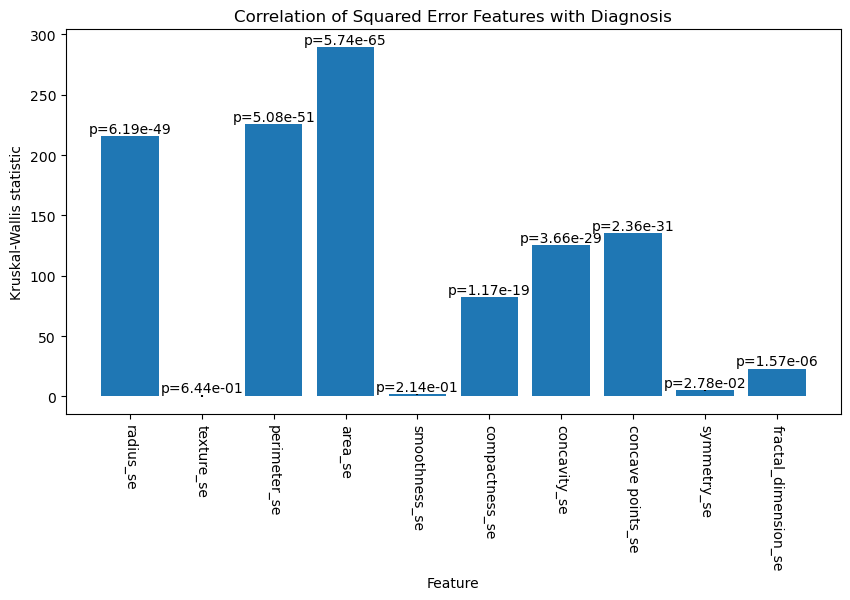

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', se_cols], yerr=res.loc['p-value', se_cols])
ax.set_xticks(ind, labels=se_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Squared Error Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.2e' % e for e in res.loc['p-value', se_cols]])

plt.show()

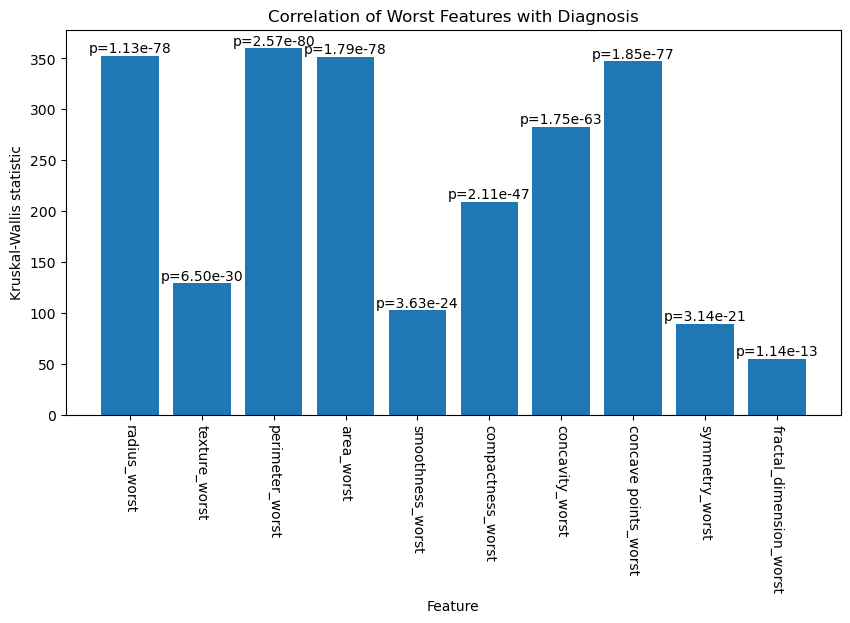

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
p1 = ax.bar(x=ind, height=res.loc['Statistic', worst_cols], yerr=res.loc['p-value', worst_cols])
ax.set_xticks(ind, labels=worst_cols, rotation=-90)
ax.set_xlabel("Feature")
ax.set_ylabel("Kruskal-Wallis statistic")
ax.set_title('Correlation of Worst Features with Diagnosis')
ax.bar_label(p1, labels=['p=%.2e' % e for e in res.loc['p-value', worst_cols]])

plt.show()

# Principal Component Analysis

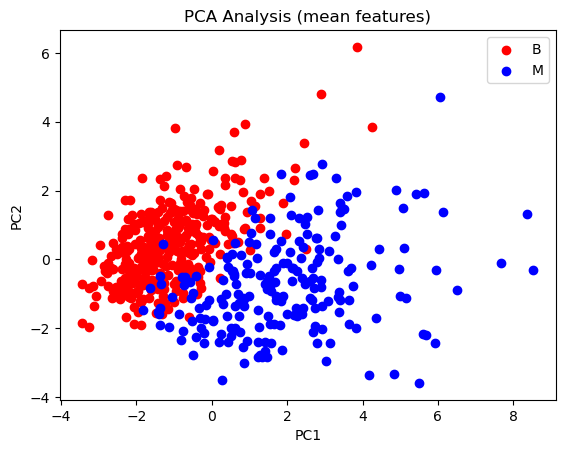

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (mean features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

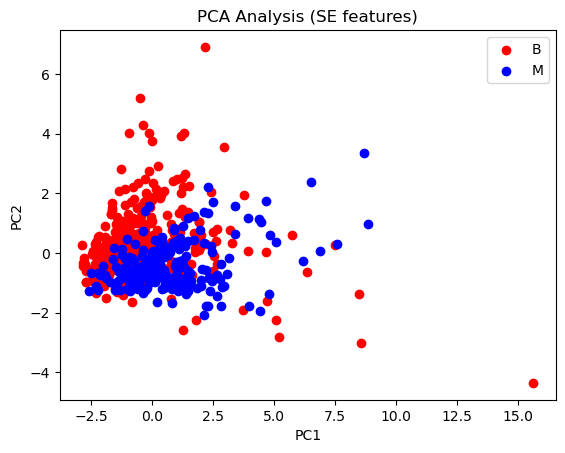

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (SE features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

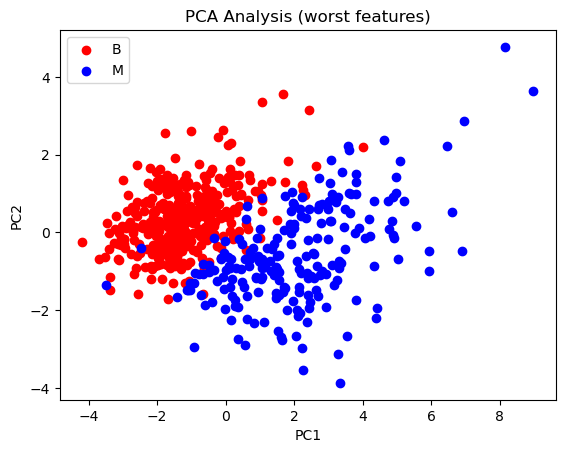

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_cols = ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (worst features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

Check the number of principal components needed to explain variance (at a specific threshold)
- Thresholds: 95%/99%

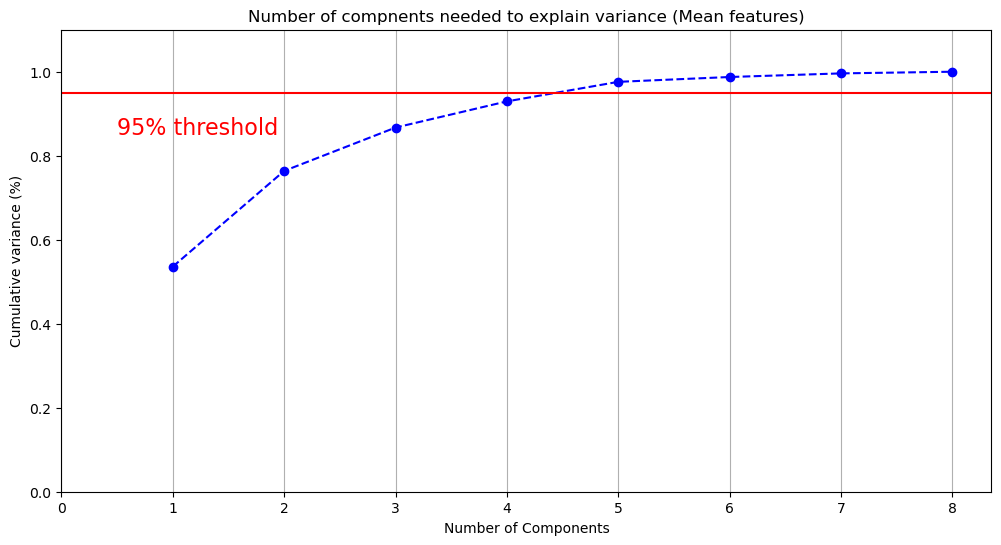

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (Mean features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

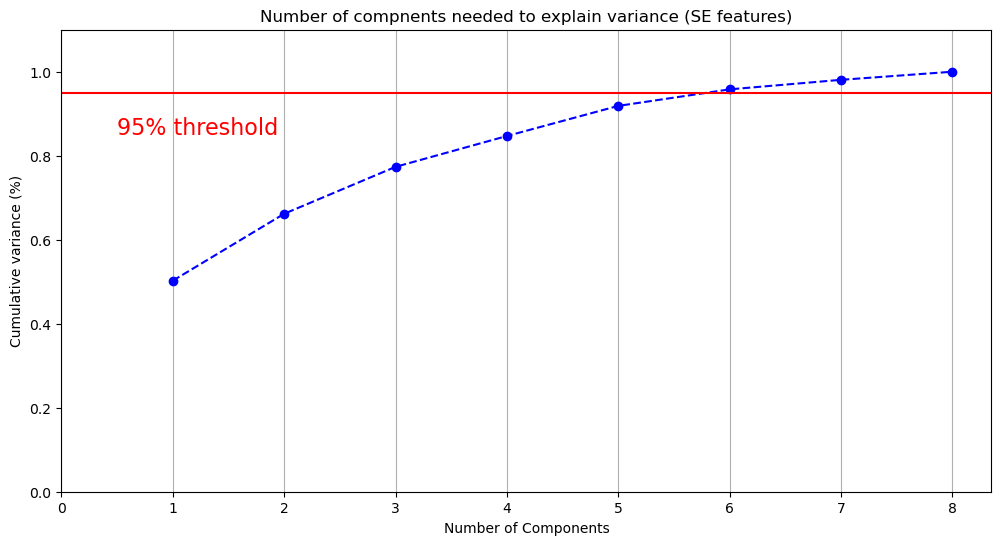

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (SE features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

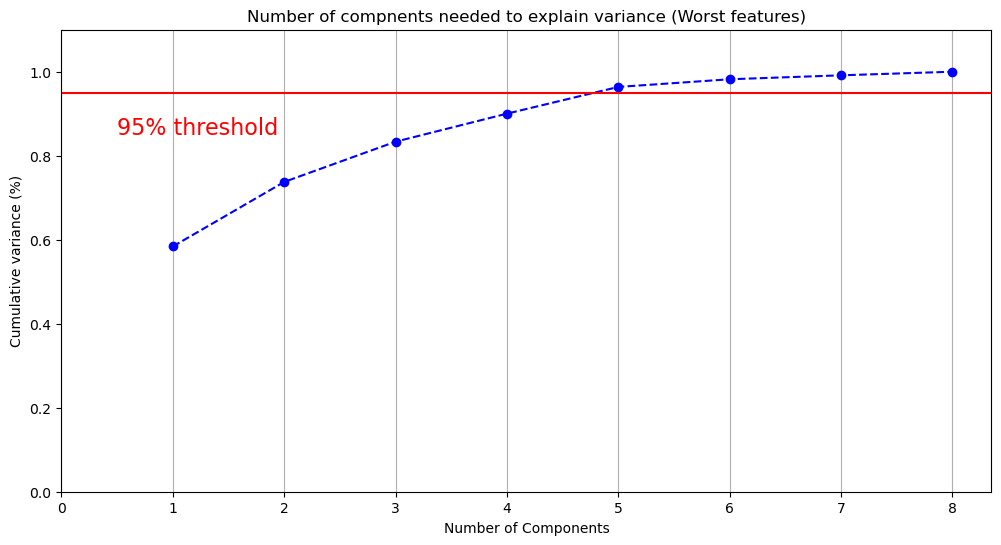

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_cols = ['radius_worst', 'texture_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
y_col = ['diagnosis']

X = df.loc[:, X_cols]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (Worst features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

Utilize all columns from dataframe together and do PCA analysis

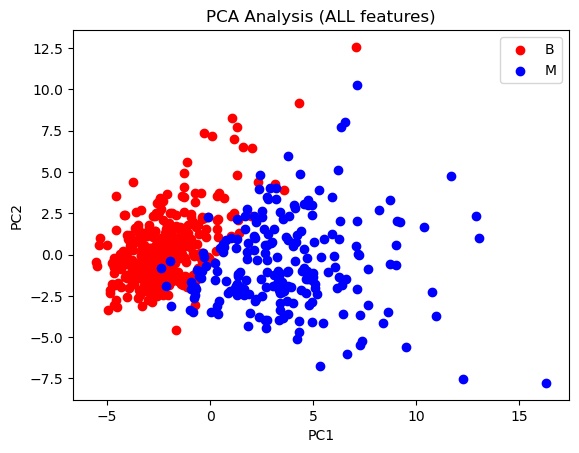

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y_col = ['diagnosis']

X = df.iloc[:, 1:]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_ratio_

from matplotlib.colors import ListedColormap

for i, j in enumerate(np.unique(y)):
    plt.scatter(X_pca[list(y.index[y['diagnosis'] == j]), 0], X_pca[list(y.index[y['diagnosis'] == j]), 1],
                c = ['red', 'blue'][i], label = j)

plt.title('PCA Analysis (ALL features)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

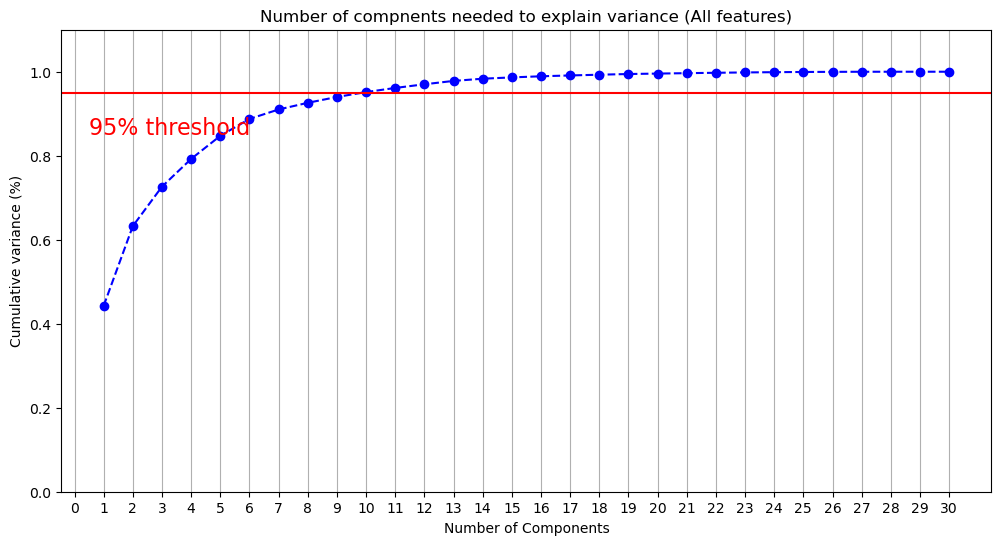

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

y_col = ['diagnosis']

X = df.iloc[:, 1:]
y = df.loc[:, y_col]

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA().fit(X)

fig, ax = plt.subplots(figsize=(12,6))
y = np.cumsum(pca.explained_variance_ratio_)
xi = np.arange(1, len(y)+1, step=1)

plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, len(y)+1, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Number of compnents needed to explain variance (All features)')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% threshold', color='red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Create Dataframes for Analysis

1. Drop the redundant columns
    - perimeter and area
    - compactness and concave points

2. Generate PCA dimensionally reduced data

In [48]:
# Handling Class Imbalances
#Creating a dictionary using a for loop for class weights
target = df["diagnosis"]
target = target.replace({'B':0,'M':1})

class_weight = {}

for i in range(len(np.unique(target))):
    
    for x in [0.5]:                                                 
        class_weight[i] = x
        
print('Class Weights:')
print(class_weight)

Class Weights:
{0: 0.5, 1: 0.5}


In [79]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['diagnosis'], axis = 1)
# Splitting training and testing set
train_inputs, test_inputs, train_targets, test_targets = train_test_split(predictors, target, test_size=0.25, random_state=42)

# Scaling the features
train_scaled = sc.fit_transform(train_inputs.astype(float, 64))
test_scaled = sc.transform(test_inputs.astype(float, 64))
test_scaled = pd.DataFrame(test_scaled, columns=train_inputs.columns)
train_scaled = pd.DataFrame(train_scaled, columns=test_inputs.columns)

# Feature selection for models effected by multicollinearity
train_scaled_fs = train_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)
test_scaled_fs = test_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)

In [94]:
#PCA transformation and feature selection for models that require it
pca95 = PCA(n_components = 0.95)

train_pca = pca95.fit_transform(train_scaled)
test_pca = pca95.transform(test_scaled)

train_pca = pd.DataFrame(train_pca)
train_pca.rename(columns=lambda x: "PC " + str(x + 1), inplace=True)

test_pca = pd.DataFrame(test_pca)
test_pca.rename(columns=lambda x: "PC " + str(x + 1), inplace=True)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
0,-4.307702,-1.878763,-0.096336,-1.788554,1.707234,0.541122,0.167312,0.537814,0.324546,-0.256925
1,2.370195,2.003231,-2.412576,0.363958,-0.468697,-0.138808,0.582370,-0.641868,-0.575915,-0.009327
2,-1.928674,-0.229950,0.699843,0.469417,1.078276,2.370342,0.272698,-0.064284,-0.016542,0.046921
3,3.373326,-1.657578,-1.951035,2.376400,1.024938,-0.902455,-0.231240,-0.030687,-0.050130,-0.287160
4,4.897018,-3.028985,2.573167,-0.015154,0.186734,0.931497,-1.394939,0.296776,-0.510443,-1.357816


## Logistic Regression (No PCA)

Logistic Regression accuracy: 0.979
Sensitivity:  0.9814814814814815
Specificity:  0.9775280898876404


[Text(0, 0.5, 'M'), Text(0, 1.5, 'B')]

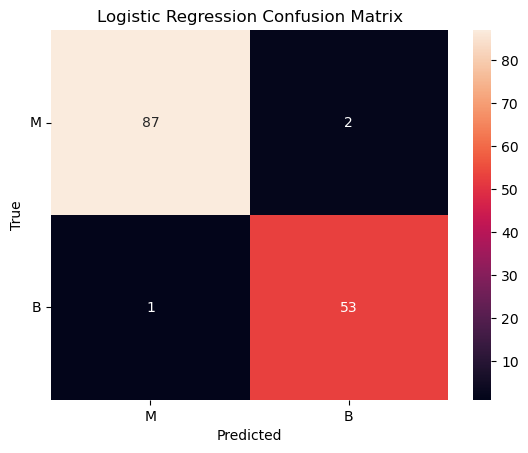

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Hyperparameters search grid 
log_grid = {'C': [1e-03, 1e-2, 1e-1, 1, 10], 
                 'penalty': ['l1', 'l2']}

log_estimator = LogisticRegression(solver='liblinear', class_weight=class_weight, random_state=42)
# Finding optimal hyperparameters and fitting model
log_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_model.fit(train_scaled_fs, train_targets)
best_log = log_model.best_estimator_
log_pred = best_log.predict(test_scaled_fs)
print('Logistic Regression accuracy:', round(accuracy_score(test_targets, log_pred), 3))

# Calculating confusion matrix, sensitivity, and specificity
lg_cm = confusion_matrix(test_targets, log_pred)

tn, fp, fn, tp = confusion_matrix(test_targets, log_pred).ravel()
print("Sensitivity: ", (tp / (tp + fn)))
print("Specificity: ", (tn / (tn + fp)))

classes = ['M', 'B']

# Plotting confusion matrix
ax = plt.subplot()
sns.heatmap(lg_cm, annot=True, ax = ax, fmt='g') 
ax.set_xlabel('Predicted')
ax.set_ylabel('True') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(classes) 
ax.yaxis.set_ticklabels(classes, rotation=360)

Logistic Regression with PCA accuracy: 0.993
Sensitivity:  0.9814814814814815
Specificity:  1.0


[Text(0, 0.5, 'M'), Text(0, 1.5, 'B')]

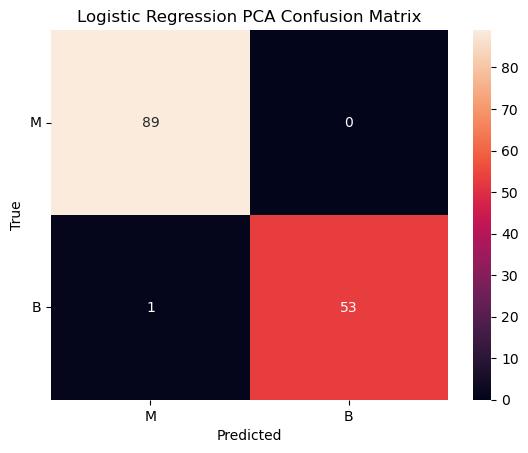

In [97]:
# Finding optimal hyperparameters and fitting model
log_pca_model = GridSearchCV(estimator=log_estimator, 
                  param_grid=log_grid, 
                  cv=3,
                  scoring='accuracy')

log_pca_model.fit(train_pca, train_targets)
best_log_pca = log_pca_model.best_estimator_
log_pca_pred = best_log_pca.predict(test_pca)
print('Logistic Regression with PCA accuracy:', round(accuracy_score(test_targets, log_pca_pred), 3))       

# Calculating confusion matrix, sensitivity, and specificity
lg_pca_cm = confusion_matrix(test_targets, log_pca_pred)

tn, fp, fn, tp = confusion_matrix(test_targets, log_pca_pred).ravel()
print("Sensitivity: ", (tp / (tp + fn)))
print("Specificity: ", (tn / (tn + fp)))

# Plotting confusion matrix
ax = plt.subplot()
sns.heatmap(lg_pca_cm, annot=True, ax = ax, fmt='g') 
ax.set_xlabel('Predicted')
ax.set_ylabel('True') 
ax.set_title('Logistic Regression PCA Confusion Matrix') 
ax.xaxis.set_ticklabels(classes) 
ax.yaxis.set_ticklabels(classes, rotation=360)